In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pymc3 as pm


Text(0, 0.5, '$x_2$')

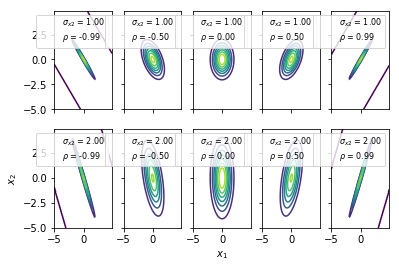

In [4]:
'''二维正态分布的等值线图'''
sigma_x1 = 1
sigmas_x2 = [1, 2]
rhos = [-0.99, -0.5, 0, 0.5, 0.99]

x, y = np.mgrid[-5:5:.1, -5:5:.1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
f, ax = plt.subplots(len(sigmas_x2), len(rhos), sharex=True, sharey=True)

for i in range(2):
    for j in range(5):
        sigma_x2 = sigmas_x2[i]
        rho = rhos[j]
        #协方差矩阵
        cov = [[sigma_x1 ** 2, sigma_x1*sigma_x2*rho],
              [sigma_x1*sigma_x2*rho, sigma_x2**2]]
        rv = stats.multivariate_normal([0, 0], cov)
        ax[i, j].contour(x, y, rv.pdf(pos))
        ax[i, j].plot(0, 0,
                     label = "$\\sigma_{{x2}}$ = {:3.2f}\n$\\rho$ = {:3.2f}".format(sigma_x2, rho), alpha=0)
        ax[i, j].legend(fontsize=8)
ax[1,2].set_xlabel('$x_1$')
ax[1,0].set_ylabel('$x_2$')
